<h2 style = "color:blue"> Projeto Mega - V3.JF </h2>
<h3> Análise propriedades matemáticas dos sorteios</h3>
<img src = "imagens/LogoJoao-2019.png" alt="Nada" style = "float:left;width:100px; height:70px">

In [1]:
# imports iniciais 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.core.display import HTML

%matplotlib inline

In [2]:
df = pd.read_csv("data/dezenasGanhadorasSorteadas.csv")
df.head(3)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0


In [3]:
# Somda das dezenas ganhadoras sorteadas em cada concurso
df["Soma"] = (df[list(df.columns)].sum(axis=1))-df["Concurso"]

In [4]:
df.head(10)

,Concurso,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Soma
0,2.0,9.0,39.0,37.0,49.0,43.0,41.0,218.0
1,3.0,36.0,30.0,10.0,11.0,29.0,47.0,163.0
2,11.0,25.0,15.0,58.0,37.0,59.0,38.0,232.0
3,17.0,10.0,20.0,6.0,19.0,51.0,13.0,119.0
4,24.0,1.0,8.0,14.0,28.0,33.0,43.0,127.0
5,29.0,14.0,56.0,58.0,8.0,43.0,3.0,182.0
6,33.0,5.0,33.0,49.0,17.0,42.0,39.0,185.0
7,41.0,38.0,26.0,35.0,39.0,12.0,47.0,197.0
8,49.0,33.0,7.0,43.0,35.0,13.0,55.0,186.0
9,54.0,5.0,21.0,9.0,56.0,18.0,36.0,145.0


<function matplotlib.pyplot.show(*args, **kw)>

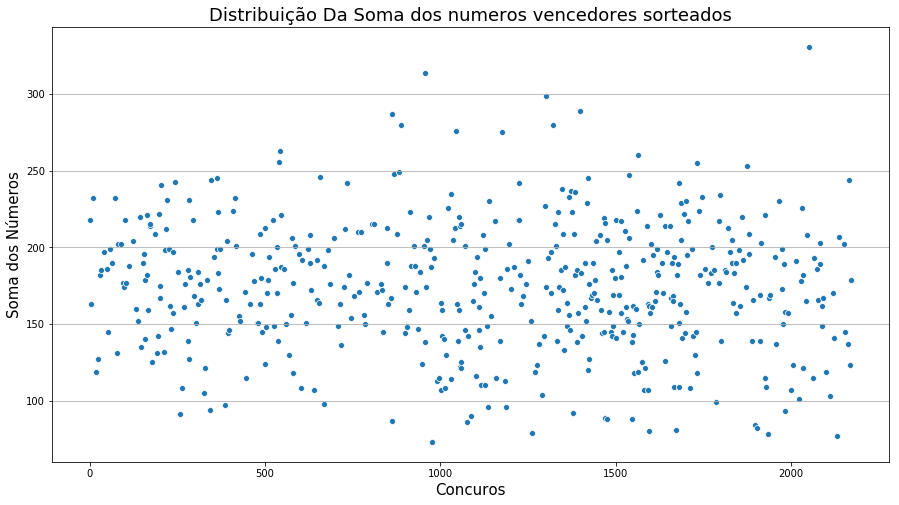

In [5]:
# Dezenho de um grafico scaterplot para a soma dos numeros sorteados na busca de algum tipo de distribuição
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x="Concurso", y="Soma", data= df)
ax.set_title('Distribuição Da Soma dos numeros vencedores sorteados', fontsize=18)
plt.ylabel('Soma dos Números', fontsize= 15)
plt.xlabel('Concuros', fontsize= 15)
plt.grid(axis='y')
plt.show

<h3 style="color:red"> Interpretação dos dados do grafico de somas:</h3>
<p> Pode-se observar que os dados cocentram-se em maior quantidade (maior densidade) entre os valores de soma de 
    <b>150 a 200 </b> que então demonstra uma tendencia para que a soma dos numeros escolhidos deva estar entre
    esses valores para ter maior sorte de ocorrencia. </p>

In [6]:
fig.savefig('imagens/scaterDaSoma_01.png')

In [7]:
#criando uma linha de regressão linear 

#separando os valores estudados no dataframe
X = df.iloc[:,0].values
y = df.iloc[:,7].values
#Criando a correlação
corr = np.corrcoef(X,y)

# Da equação da reta temos y = b0 + b1*X abaixo determinamos os coeficientes

X = X.reshape(-1,1)
#importando a biblioteca do sklearn para regressão
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)
#b1
regr.coef_
#b0 
regr.intercept_


179.5835079742693

Text(0.5,1,'Regressão Linear')

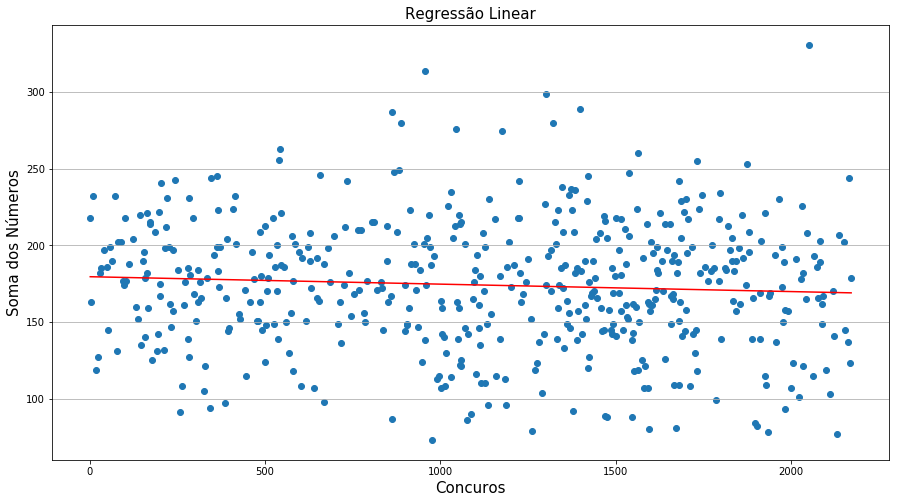

In [8]:
#Criando o grafico da regressão linear
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(X,y)
plt.plot(X,regr.predict(X), color="red")
plt.ylabel('Soma dos Números', fontsize= 15)
plt.xlabel('Concuros', fontsize= 15)
plt.grid(axis='y')
plt.title("Regressão Linear", fontsize= 15)

In [11]:
fig.savefig('imagens/regressao_01.png')

In [9]:
# Avaliando o modelo de regressão pelo score
score = regr.score(X,y)
print(score)

0.004827516199928162


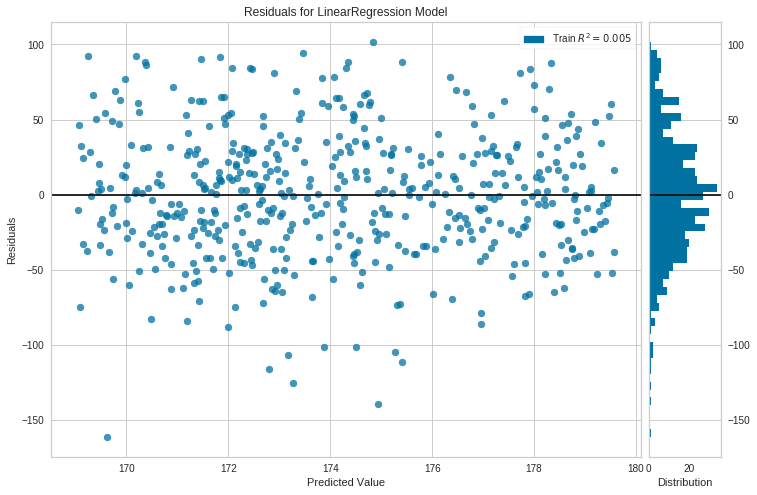

In [14]:
# Utilizando outra biblioteca para analise desta regressão 
from yellowbrick.regressor import ResidualsPlot

fig2, ax = plt.subplots(figsize=(12,8))
visual = ResidualsPlot(regr)
visual.fit(X,y)
visual.poof()

In [15]:
fig2.savefig('imagens/regressao_02DistNormal.png')